### Importing the libraries

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.7.0'

## observing a sample  image from each X-Ray class

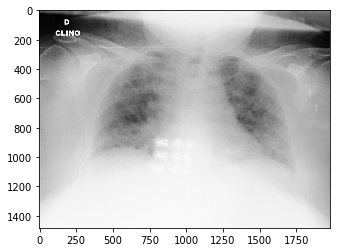

In [4]:
covid19_sample_image= imread('Dataset/train/COVID19/COVID19(1).jpg')
plt.imshow(covid19_sample_image)

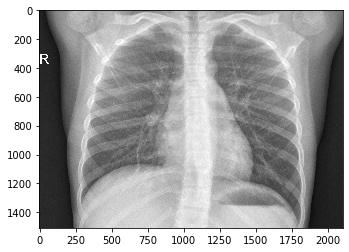

In [5]:
normal_sample_image= imread('Dataset/train/NORMAL/NORMAL(1).jpg')
plt.imshow(normal_sample_image)

## Part 1 - Data Preprocessing  

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1718 images belonging to 2 classes.


In [7]:
training_set.class_indices

{'COVID19': 0, 'NORMAL': 1}

### Preprocessing the Test set

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 433 images belonging to 2 classes.


In [9]:
test_set.class_indices

{'COVID19': 0, 'NORMAL': 1}

## Part 2 - Building the CNN

### Initialising the CNN model

In [10]:
# Initialising the CNN

model = tf.keras.models.Sequential()

#Convolation
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#pooling
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Dropout(rate=0.2))

#adding a second convoulutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(rate=0.2))
#flattening
model.add(tf.keras.layers.Flatten())
#Full connection
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
#output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN model

### Compiling the CNN model

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN model on the Training set and evaluating it on the Test set

In [12]:
model.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
54/54 [==============================] - 175s 3s/step - loss: 0.5081 - accuracy: 0.7730 - val_loss: 0.2000 - val_accuracy: 0.9677
Epoch 2/15
54/54 [==============================] - 172s 3s/step - loss: 0.2270 - accuracy: 0.9144 - val_loss: 0.1592 - val_accuracy: 0.9330
Epoch 3/15
54/54 [==============================] - 170s 3s/step - loss: 0.1653 - accuracy: 0.9406 - val_loss: 0.0919 - val_accuracy: 0.9700
Epoch 4/15
54/54 [==============================] - 167s 3s/step - loss: 0.1324 - accuracy: 0.9523 - val_loss: 0.1270 - val_accuracy: 0.9561
Epoch 5/15
54/54 [==============================] - 171s 3s/step - loss: 0.1420 - accuracy: 0.9540 - val_loss: 0.0763 - val_accuracy: 0.9792
Epoch 6/15
54/54 [==============================] - 171s 3s/step - loss: 0.1074 - accuracy: 0.9657 - val_loss: 0.0950 - val_accuracy: 0.9654
Epoch 7/15
54/54 [==============================] - 170s 3s/step - loss: 0.1240 - accuracy: 0.9581 - val_loss: 0.0780 - val_accuracy: 0.9769
Epoch 8/15
54

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

## Part 4 - Visualize training and making a single prediction

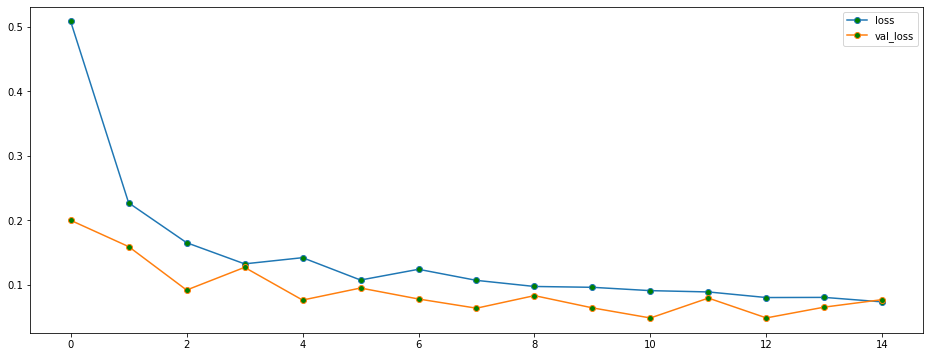

In [14]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

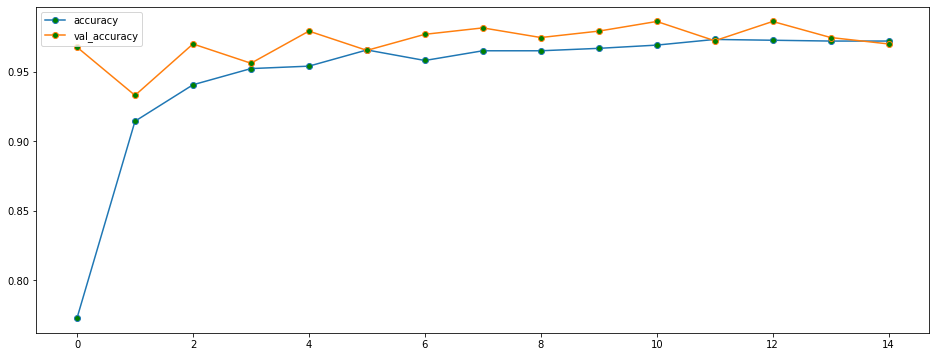

In [15]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

In [30]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Dataset/predict/NORMAL(1265).jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'COVID19'
else:
  prediction = 'NORMAL'

In [31]:
print(prediction)

NORMAL


In [32]:
test_image = image.load_img('Dataset/predict/COVID19(456).jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'COVID19'
else:
  prediction = 'NORMAL'

In [33]:
print(prediction)

COVID19
